# ECG Signal
## by Tiffany Nguyen
### Description
The purpose of this lab is to process ECG signal from a text file and use that data to estimate a patient's heart rate.
### Process
- Read the data in the ECG text file
- Plot the data on a graph using `matplotlib.pyplot`
- Identify and plot QRS complexes (peaks) using `scipy.signal`'s `find_peaks`
- Find the time interval between consecutive peaks
- Calculate the standard deviation of the time interval
- Calculate the average, maximum, and minimum heart rate 

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [134]:
#open file
ECG_signal_path = '/Users/tiffanynguyen/Downloads/tagged/SCU/BIOE 45/Lab/Week 7/ecg_signal.txt'
ECG_signal_file = open(ECG_signal_path, 'r')

In [135]:
# Read the data in the file
ECG_signal = list() #create list to hold data
for signal in ECG_signal_file: #read the data line by line
    ECG_signal.append(int(signal.strip('\n'))) #read the data as an integer and add it to ECG_signal

ECG_signal = np.array(ECG_signal) #convert list to np array
print("ECG_signal length:", len(ECG_signal))
# print(ECG_signal)

ECG_signal_file.close() #close file

ECG_signal length: 15000


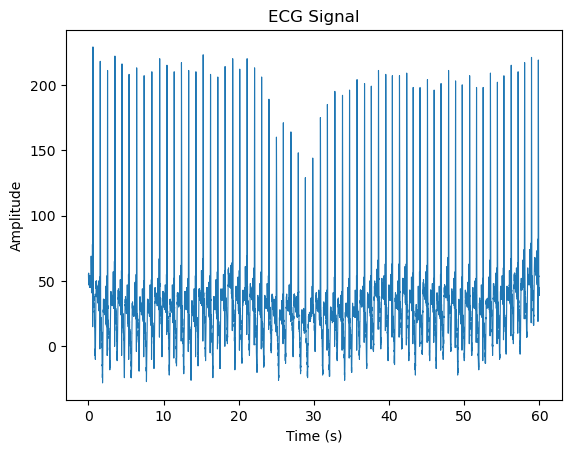

In [136]:
#plot the full wayform
sampling_frequency = 250; #Hz
t = np.arange(0, len(ECG_signal))/sampling_frequency; #convert frequency to time

plt.plot(t, ECG_signal, linewidth=0.8) #decrease linewidth so more visible
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.show()

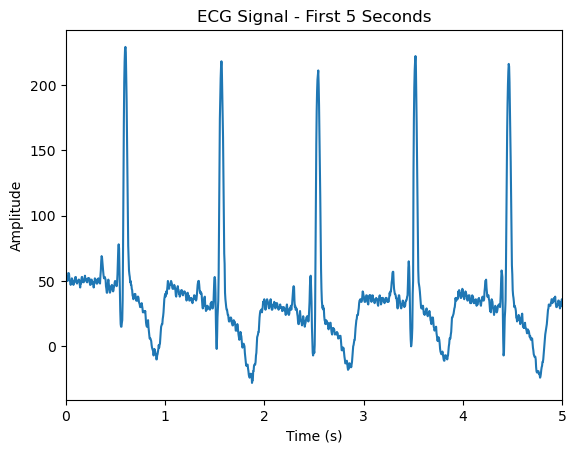

In [137]:
#plot the first 5 seconds of the wayform
plt.plot(t, ECG_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG Signal - First 5 Seconds')
plt.xlim((0,5)) #limit to first 5 seconds
plt.show()

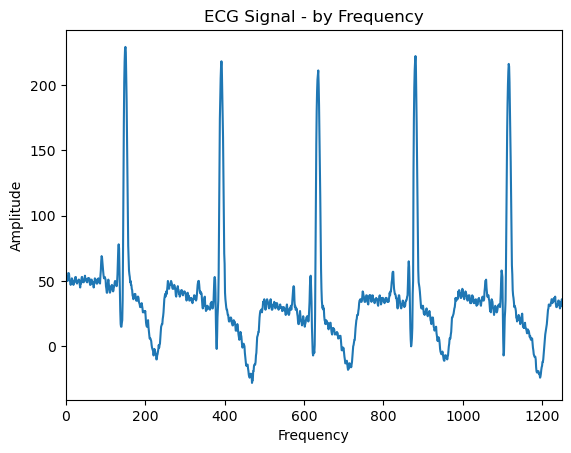

In [138]:
#plot the wayform based on Frequency
plt.plot(ECG_signal) #don't include x axis so by frequency
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('ECG Signal - by Frequency')
plt.xlim((0,5 * sampling_frequency)) #first 5 seconds in terms of frequency
plt.show()

In [139]:
# Identify the QRS complexes (peaks) location in the ECG signal
peaks, _ = find_peaks(ECG_signal, distance=200)
print(peaks)

[  150   392   636   881  1116  1351  1604  1852  2108  2370  2612  2852
  3094  3333  3575  3816  4061  4303  4545  4798  5033  5278  5526  5761
  6004  6253  6483  6735  6980  7214  7461  7716  7948  8196  8451  8685
  8935  9184  9409  9648  9889 10110 10346 10587 10802 11030 11277 11499
 11729 11979 12212 12433 12680 12909 13129 13372 13603 13819 14063 14292
 14509 14738 14965]


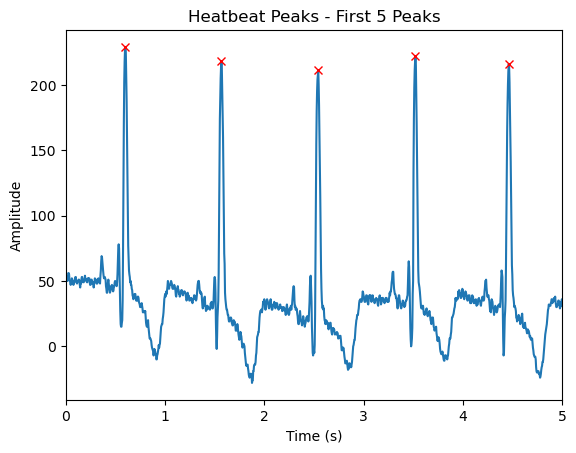

In [140]:
# Label peaks on the original graph
plt.plot(t, ECG_signal) #plot signal
plt.plot(t[peaks], ECG_signal[peaks], "rx") #plot x at peaks
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Heatbeat Peaks - First 5 Peaks')
plt.xlim((0,5))
plt.show()

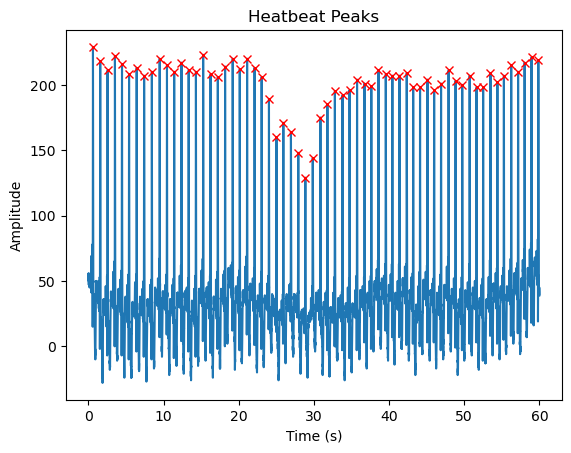

In [141]:
# Label peaks on the entire original graph to check
plt.plot(t, ECG_signal) #plot signal
plt.plot(t[peaks], ECG_signal[peaks], "rx") #plot x at peaks
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Heatbeat Peaks')
plt.show()

In [142]:
# Time Interval between consecutive peaks
time_interval = np.zeros((len(peaks) - 1)) #intialize np array to hold time interval
for i in range (len(peaks) - 1): #iterate through peaks, -1 becuase subtract next peak by current peak
    cur_time_interval = peaks[i+1] - peaks[i] # distance between peaks
    cur_time_interval_sec = cur_time_interval / sampling_frequency # convert to seconds
    time_interval[i] = cur_time_interval_sec # update time_interval array
print("Time interval: \n", time_interval)

Time interval: 
 [0.968 0.976 0.98  0.94  0.94  1.012 0.992 1.024 1.048 0.968 0.96  0.968
 0.956 0.968 0.964 0.98  0.968 0.968 1.012 0.94  0.98  0.992 0.94  0.972
 0.996 0.92  1.008 0.98  0.936 0.988 1.02  0.928 0.992 1.02  0.936 1.
 0.996 0.9   0.956 0.964 0.884 0.944 0.964 0.86  0.912 0.988 0.888 0.92
 1.    0.932 0.884 0.988 0.916 0.88  0.972 0.924 0.864 0.976 0.916 0.868
 0.916 0.908]


In [143]:
# Compute the standard deviation
standard_deviation = np.std(time_interval);
print("Standard Deviation: {:.4f}".format(standard_deviation))

Standard Deviation: 0.0429


In [144]:
#Compute Average Heartrate
average_time = np.mean(time_interval) #sec/beat
avg_rate_bps = 1/average_time #beat/sec
avg_rate_bpm = avg_rate_bps * 60 #beat/min
print("Average Heart Rate: {:.2f} bpm".format(avg_rate_bpm))

Average Heart Rate: 62.77 bpm


In [145]:
#Compute Average Heartrate
max_time = np.max(time_interval)
min_rate_bps = 1/max_time
min_rate_bpm = min_rate_bps * 60
print("Min Heart Rate: {:.2f} bpm".format(min_rate_bpm))

Min Heart Rate: 57.25 bpm


In [146]:
min_time = np.min(time_interval)
max_rate_bps = 1/min_time
max_rate_bpm = max_rate_bps * 60
print("Max Heart Rate: {:.2f} bpm".format(max_rate_bpm))

Max Heart Rate: 69.77 bpm
